In [8]:
#função para resolver sistemas de EDOs
from sage.calculus.desolvers import desolve_system_rk4
#função para abrir imagens e gifs
from IPython.display import Image

Cardioide: $\alpha(t) = (2\cos(t)−\cos(2t), 2\sin(t)−\sin(2t))$

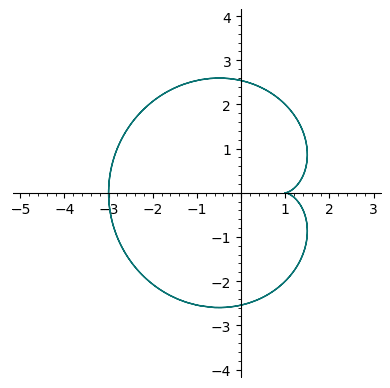

In [14]:
#declara a variável
s = var("s")
#parametrização da curva
alpha(s) = (2*cos(s)-cos(2*s), 2*sin(s)-sin(2*s))
#vetor tangente
d_alpha = diff(alpha, s)
#plot da curva
curve = parametric_plot(alpha, (s, 0, 4*pi), color='#0A7373')

figure = []
t = 0
#plots dos vetores tangentes 
while(t<=4*pi):
    figure.append(plot(d_alpha.subs(s=t), start=alpha.subs(s=t), color='#962B09'))
    t += 4*pi/100

#junta os plots dos vetores e da curva
figures = []
for i in figure:
    figures.append(curve+i)

#produz a animação
a = animate(figures, xmin = -5, xmax = 3, ymin = -4, ymax = 4)
a.save("img/cardioide.gif")
Image(open('img/cardioide.gif','rb').read())

    Espiral logaritmica: $\alpha(s)=(\cos(s)e^s,\sin(s)e^s)$

Parametrização por comprimento de arco: 
B(t)= (1/2*sqrt(2)*t*cos(log(1/2*sqrt(2)*t)), 1/2*sqrt(2)*t*sin(log(1/2*sqrt(2)*t)))


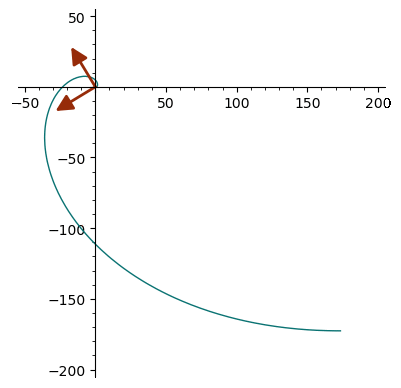

In [15]:
s = var("s")

alpha(s) = (cos(s)*e^s, sin(s)*e^s)
d_alpha = diff(alpha, s)
dd_alpha = diff(d_alpha, s)
curve_alpha = parametric_plot(alpha, (s, 0.01, 5.5), color='#0A7373')

figure = []
#plot dos vetores velocidade e aceleração(\alpha' e \alpha'')
i = 0.01
while(i<=5.5):
    figure.append(plot(33*d_alpha.subs(s=i)/d_alpha.subs(s=i).norm(),start=alpha.subs(s=i),color='#962B09',aspect_ratio=1)
                 + plot(33*dd_alpha.subs(s=i)/d_alpha.subs(s=i).norm(),start=alpha.subs(s=i),color='#962B09', aspect_ratio=1))
    i += 5.5/50
a = animate([curve_alpha+x for x in figure], xmin=-50, xmax=200, ymin=-200, ymax=50)
a.save("img/non-unit.gif")
Image(open('img/non-unit.gif','rb').read())

#calculo da parametrização por comprimento de arco:
t = var("t")
#calcula a função comprimento de arco
L_alpha = d_alpha.norm().integral(s)
#calcula o difeomorfismo \phi(t)
phi(t) = solve(t == L_alpha(s), s)[0].rhs()
#calcula reparametrização beta (unit speed)
beta(t) = alpha(phi(t))
print("Parametrização por comprimento de arco: \nB(t)=", beta(t))

d_beta = diff(beta, t)
dd_beta = diff(d_beta, t)
t_final = solve(phi(t)==5.5,t)[0].rhs().n()
curve_beta = parametric_plot(beta, (t, 0.01, t_final), color='#0A7373')

figure = []
i = 0.01
#plot dos vetores velocidade e aceleração(\beta' e \beta'')
while(i<=t_final):
    figure.append(plot(33*d_beta.subs(t=i)/d_beta.subs(t=i).norm(),start=beta.subs(t=i),color='#962B09',aspect_ratio=1)
                 + plot(33*dd_beta.subs(t=i)/dd_beta.subs(t=i).norm(),start=beta.subs(t=i),color='#962B09', aspect_ratio=1))
    i += t_final/50
b = animate([curve_beta+x for x in figure], xmin=-50, xmax=200, ymin=-200, ymax=50)
b.save("img/unit.gif")
Image(open('img/unit.gif','rb').read())

Analisando as duas animações, podemos notar duas diferenças: a velocidade com que a curva é percorrida na reparametrização por comprimento de arco é constante, diferentemente da parametrização orginal; além disso, também podemos notar que $\beta'$ e $\beta''$ são ortogonais, diferentemente de $\alpha'$ e $\alpha''$

In [2]:
def get_curvature(curve):
    #atribui o parâmetro da função a t
    parameters = set()
    for coordinate in curve:
        parameters.update(list(coordinate.arguments()))
    t = parameters.pop()
    
    #calcula seus vetores velocidade e aceleração(\alpha' e \alpha'')
    alpha(t) = curve
    d_alpha = diff(alpha, t)
    dd_alpha = diff(d_alpha, t)
    
    #se \alpha' = 0, retorna 0 (para economizar cálculos)
    if d_alpha(t) == (0,0):
        print(alpha, "não é regular")
        return 0
    
    #define o vetor (\alpha' , \alpha'')
    M = matrix(SR,[d_alpha(t),dd_alpha(t)]).T
    #calcula a curvatura
    K = M.det()/d_alpha.norm()^3
    return K.simplify_full()

In [3]:
S1(s) = (cos(s),sin(s))
print(get_curvature(S1))

1


In [10]:
def get_curve(k,theta_0=0,x_0=0,y_0=0,s_0=0):
    #atribui o parâmetro da função a s
    s = k.arguments()[0]
    #calcula \theta(s)
    theta(s) = integrate(k,s)+theta_0
    #calcula x(s) e y(s)
    x = function('x')(s)
    y = function('y')(s)
    eq1 = diff(x,s) == cos(theta)
    eq2 = diff(y,s) == sin(theta)
    sol = desolve_system([eq1,eq2], [x,y], ics=[s_0,x_0,y_0])
    #retorna a parametrização (x(s),y(s))
    return (sol[0].rhs(), sol[1].rhs())

(sin(t), -cos(t) + 1)


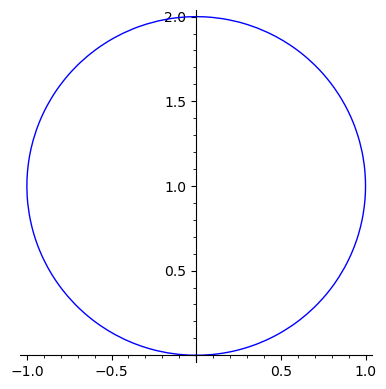

In [13]:
k(t)=1
alpha = get_curve(k)
print(alpha)
parametric_plot(alpha,(t,0,2*pi)).save("img/circle1.png")
Image(open('img/circle1.png','rb').read())

Observe que obtivemos a curva deslocada da origem (o que não é nenhum problema, pois o teorema fundamental das curvas planas indica justamente que sua curvatura é a mesma a menos de um movimento rígido, como é o caso da translação). Isso ocorreu porque, para as condições iniciais do sistema, passamos os argumentos $[0,0,0]$ por padrão, o que indica que $x(0)=y(0)=0$ e, como $\cos(0)=1$ , obtemos $y(t)=-\cos(t)+1$ para satisfazer as condições iniciais. 
Podemos obter o círculo centrado na origem da seguinte forma:

(sin(t), -cos(t))


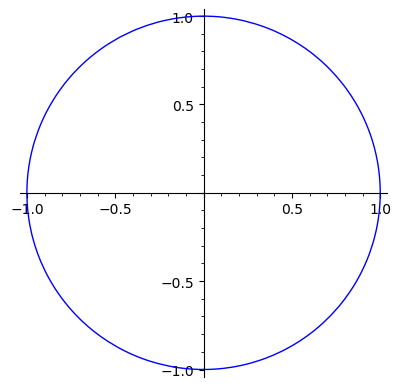

In [7]:
beta = get_curve(k, x_0=0, y_0=-1)
print(beta)
parametric_plot(beta,(t,0,2*pi))

In [25]:
def get_curve_plot(k,theta_0=0,x_0=0,y_0=0,s_0=0,s_i=-99,s_f=99,step=0.1):
    s = k.arguments()[0]
    theta, x,y = var('theta x y')
    sol = desolve_system_rk4([k(s),cos(theta),sin(theta)],[theta,x,y],
                             ivar=s, ics=[s_0,theta_0,x_0,y_0],
                             end_points=[s_i,s_f], step=step)
    pts = [[x,y] for s,theta,x,y in sol]
    return list_plot(pts, aspect_ratio=1)
    

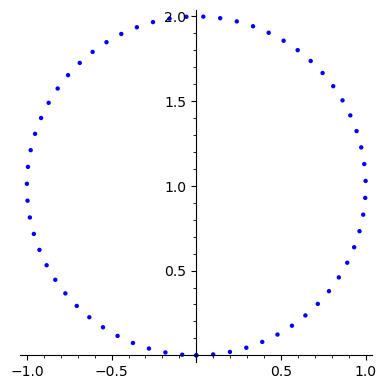

In [32]:
get_curve_plot(k, s_i=0, s_f=2*pi.n()).show()

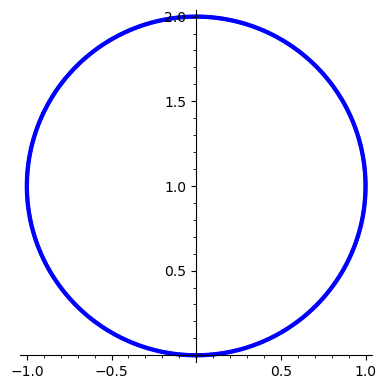

In [29]:
get_curve_plot(k, s_i=0, s_f=2*pi.n(), step=0.01).show()